<h1>Heart Failure Prediction</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

In [2]:
#reading the dataset
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df=df.rename(columns= {"DEATH_EVENT":"target"})

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


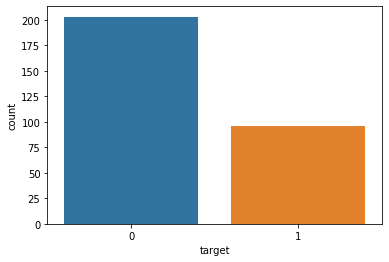

0    203
1     96
Name: target, dtype: int64


In [7]:
sns.countplot(df["target"])
plt.show()
print(df.target.value_counts())

In [8]:
print(len(df))

299


In [9]:
print("Data Shape:",df.shape)

Data Shape: (299, 13)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  target                    299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
target                      0
dtype: int64

In [12]:
#statistical summary
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


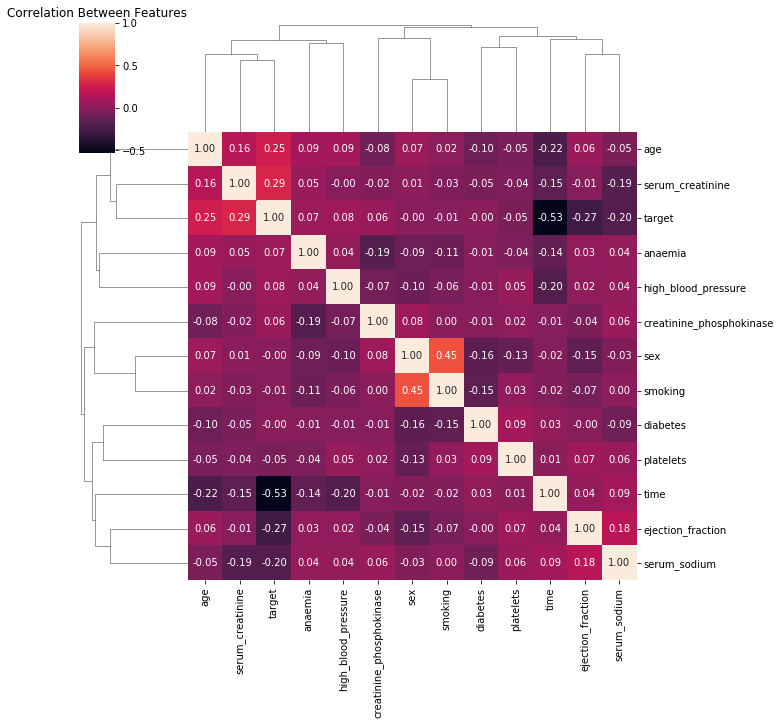

In [13]:
#heatmap
corr_matrix=df.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

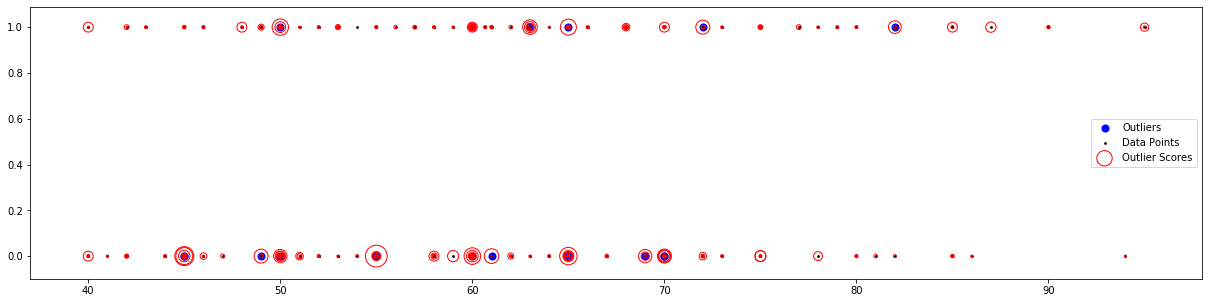

In [14]:
#outlier
y= df.target
x= df.drop(["target"],axis=1)
columns =x.columns.tolist()

clf=LocalOutlierFactor()
y_pred=clf.fit_predict(x)
X_score =clf.negative_outlier_factor_

outlier_score=pd.DataFrame()
outlier_score["score"] = X_score

#threshold
threshold =-2.5
filtre = outlier_score["score"] < threshold
outlier_index=outlier_score[filtre].index.tolist()

plt.figure(figsize=(21,5))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")

radius = (X_score.max() - X_score)/(X_score.max()-X_score-X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier Scores")
plt.legend()
plt.show()

In [15]:
#dropping outliers
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

In [16]:
#training test split
test_size=0.5
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=test_size,random_state=42)

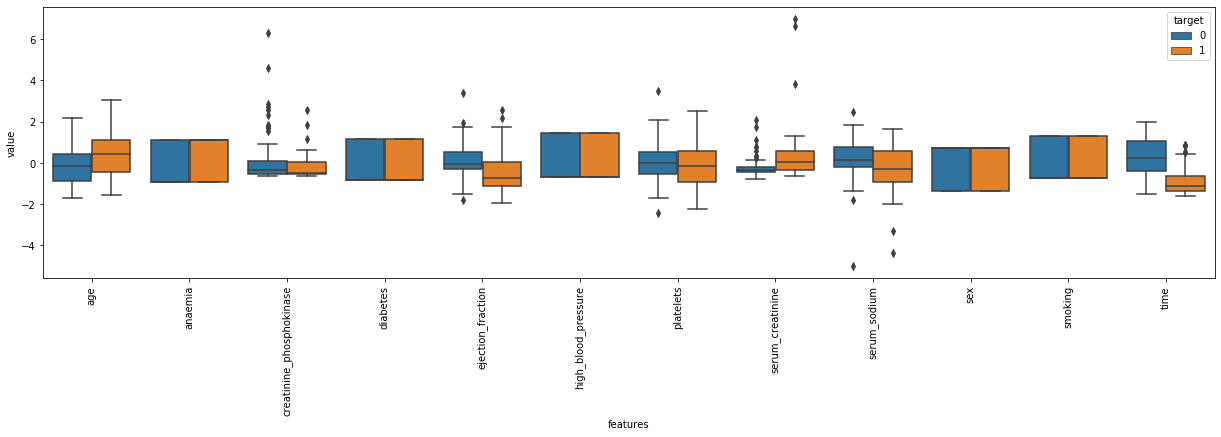

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train_df=pd.DataFrame(X_train,columns = columns)
X_train_df_describe =X_train_df.describe()
X_train_df["target"] =Y_train

data_melted=pd.melt(X_train_df,id_vars="target",
                   var_name="features",
                   value_name="value")

plt.figure(figsize=(21,5))
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

In [18]:
#basic knn method
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
acc=accuracy_score(Y_test,y_pred)
score=knn.score(X_test,Y_test)
print("Score:",score)
print("CM:",cm)

Score: 0.676056338028169
CM: [[90  3]
 [43  6]]


In [20]:
def KNN_Best_Params(x_train,x_test,y_train,y_test):   
    k_range=list(range(1,31))
    weight_options=["uniform","distance"]
    print()
    param_grid=dict(n_neighbors =k_range,weights=weight_options)
    
    knn=KNeighborsClassifier()
    grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
    grid.fit(x_train,y_train)
    
    print("Best Training Score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()
    
    knn=KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    
    y_pred_test=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    
    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_train,y_pred_train)
    
    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test,acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    
    return grid


grid = KNN_Best_Params(X_train,X_test,Y_train,Y_test)


Best Training Score: 0.7728571428571429 with parameters: {'n_neighbors': 7, 'weights': 'uniform'}

Test Score: 0.7112676056338029, Train Score: 0.8085106382978723

CM Test:  [[87  6]
 [35 14]]
CM Train:  [[96  3]
 [24 18]]


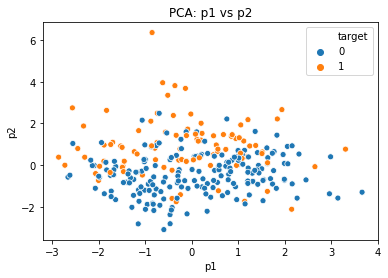

In [21]:
#pca
scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

pca=PCA(n_components=2)
pca.fit(x_scaled)
X_reduced_pca=pca.transform(x_scaled)
pca_data =pd.DataFrame(X_reduced_pca,columns =["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA: p1 vs p2")
plt.show()

In [22]:
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca=train_test_split(X_reduced_pca,y,test_size=test_size,random_state=42)
grid_pca= KNN_Best_Params(X_train_pca,X_test_pca,Y_train_pca,Y_test_pca)


Best Training Score: 0.8509523809523809 with parameters: {'n_neighbors': 26, 'weights': 'distance'}

Test Score: 0.7253521126760564, Train Score: 1.0

CM Test:  [[80 13]
 [26 23]]
CM Train:  [[99  0]
 [ 0 42]]


No handles with labels found to put in legend.


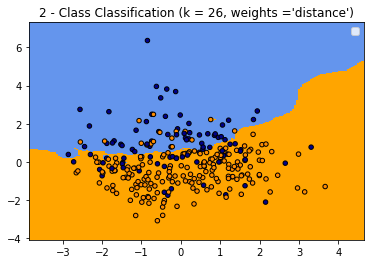

In [23]:
cmap_light =ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])

h=.05
X=X_reduced_pca
x_min,x_max=X[:,0].min()-1,X[:,0].max() + 1
y_min,y_max =X[:,1].min() - 1,X[:,1].max() + 1
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))
Z=grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,
           edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i - Class Classification (k = %i, weights ='%s')"
        %(len(np.unique(y)),grid_pca.best_estimator_.n_neighbors,grid_pca.best_estimator_.weights))
plt.legend()
plt.show()

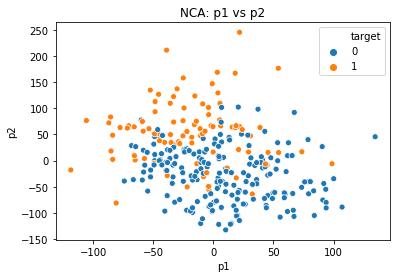

In [24]:
nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(x_scaled,y)
X_reduced_nca=nca.transform(x_scaled)

nca_data=pd.DataFrame(X_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=nca_data)
plt.title("NCA: p1 vs p2")
plt.show()


Best Training Score: 0.8861904761904762 with parameters: {'n_neighbors': 4, 'weights': 'distance'}

Test Score: 0.852112676056338, Train Score: 1.0

CM Test:  [[88  5]
 [16 33]]
CM Train:  [[99  0]
 [ 0 42]]


No handles with labels found to put in legend.


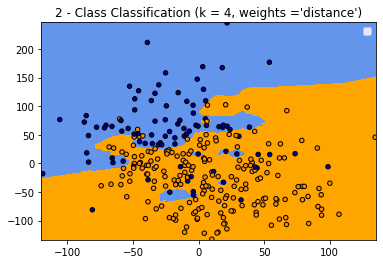

In [25]:
X_train_nca,X_test_nca,Y_train_nca,Y_test_nca=train_test_split(X_reduced_nca,y,test_size=test_size,random_state=42)
grid_nca= KNN_Best_Params(X_train_nca,X_test_nca,Y_train_nca,Y_test_nca)

cmap_light =ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])

h=.2
X=X_reduced_nca
x_min,x_max=X[:,0].min()-1,X[:,0].max() + 1
y_min,y_max =X[:,1].min() - 1,X[:,1].max() + 1
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))
Z=grid_nca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,
           edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i - Class Classification (k = %i, weights ='%s')"
        %(len(np.unique(y)),grid_nca.best_estimator_.n_neighbors,grid_nca.best_estimator_.weights))
plt.legend()
plt.show()